<a href="https://colab.research.google.com/github/Cesaraville/Housing-Price-Predictor/blob/main/Ames_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf

In [2]:
df = pd.read_csv('/content/AmesHousing.csv')

In [3]:
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


#Dropping Columns/Rows

In [4]:
ZeroSum = (df == 0).sum(axis=1)
ZeroSum.sort_values(ascending=False)

,0
1901,20
1501,20
1500,20
275,20
780,19
...,...
2570,6
1861,6
1609,6
2350,5


In [5]:
PercNull = (df.isnull().sum() / len(df)) * 100

In [6]:
PercNull.sort_values(ascending=False)

,0
Pool QC,99.556314
Misc Feature,96.382253
Alley,93.242321
Fence,80.477816
Mas Vnr Type,60.580205
...,...
Mo Sold,0.000000
Yr Sold,0.000000
Sale Type,0.000000
Sale Condition,0.000000


In [7]:
df = df.drop(['Pool QC', 'Misc Feature', 'Alley', 'Fence'], axis = 1, errors = 'ignore')

In [8]:
PercNull = (df.isnull().sum() / len(df)) * 100
PercNull

,0
Order,0.000000
PID,0.000000
MS SubClass,0.000000
MS Zoning,0.000000
Lot Frontage,16.723549
...,...
Mo Sold,0.000000
Yr Sold,0.000000
Sale Type,0.000000
Sale Condition,0.000000


#Dividing up the DataFrame

In [9]:
Categorical = df.select_dtypes(include='object')
Numerical = df.select_dtypes(exclude='object')

#Categorical Data

## Data Manipulation

In [10]:
Categorical.columns

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Sale Type', 'Sale Condition'],
      dtype='object')

In [11]:
Categorical['Garage'] = Categorical['Garage Type'].str.cat(Categorical[['Garage Finish', 'Garage Qual', 'Garage Cond']], sep='_')
Categorical.drop(['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond'], axis=1, inplace=True)
Categorical['Garage Yr Blt'] = Numerical['Garage Yr Blt'].astype(str)
Categorical['Garage'] = Categorical['Garage'].str.cat(Categorical['Garage Yr Blt'], sep='_')
Categorical.drop(['Garage Yr Blt'], axis=1, inplace=True)
Numerical.drop(['Garage Yr Blt'], axis=1, inplace=True)

In [12]:
Categorical['Condition'] = Categorical['Condition 1'].str.cat(Categorical['Condition 2'], sep='_')
Categorical.drop(['Condition 1', 'Condition 2'], axis=1, inplace=True)

In [13]:
Categorical['HouseStyle'] = Categorical['House Style'].str.cat(Categorical[['Roof Style', 'Roof Matl']], sep='_') # Change 'Roof Mat1' to 'Roof Matl'
Categorical.drop(['House Style', 'Roof Style', 'Roof Matl'], axis=1, inplace=True)

In [14]:
Categorical['BsmtFin Type'] = Categorical['BsmtFin Type 1'].str.cat(Categorical['BsmtFin Type 2'], sep='_')
Categorical.drop(['BsmtFin Type 1', 'BsmtFin Type 2'], axis=1, inplace=True)

In [15]:
Categorical['Exterior'] = Categorical['Exterior 1st'].str.cat(Categorical['Exterior 2nd'], sep='_')
Categorical.drop(['Exterior 1st', 'Exterior 2nd'], axis=1, inplace=True)

In [16]:
Categorical['Sale'] = Categorical['Sale Type'].str.cat(Categorical['Sale Condition'], sep='_')
Categorical.drop(['Sale Type', 'Sale Condition'], axis=1, inplace=True)

In [17]:
Categorical['Heating'] = Categorical['Heating'].str.cat(Categorical['Heating QC'], sep='_')
Categorical.drop(['Heating QC'], axis=1, inplace=True)

In [18]:
Categorical['Bsmt'] = Categorical['Bsmt Qual'].str.cat(Categorical['Bsmt Cond'], sep='_')
Categorical.drop(['Bsmt Qual', 'Bsmt Cond'], axis=1, inplace=True)

In [19]:
Categorical['Kitchen AbvGr'] = Numerical['Kitchen AbvGr'].astype(str)
Categorical['Kitchen'] = Categorical['Kitchen Qual'].str.cat(Categorical['Kitchen AbvGr'], sep='_')
Categorical.drop(['Kitchen Qual', 'Kitchen AbvGr'], axis=1, inplace=True)

In [20]:
Numerical['MS SubClass'] = Numerical['MS SubClass'].astype(str)
Categorical['MS'] = Numerical['MS SubClass'].str.cat(Categorical['MS Zoning'], sep='_')
Categorical.drop(['MS Zoning'], axis=1, inplace=True)
Numerical.drop(['MS SubClass'], axis=1, inplace=True)

In [21]:
Categorical['Mas Vnr Area'] = Numerical['Mas Vnr Area'].astype(str)
Categorical['Mas Vnr Type&Area'] = Categorical['Mas Vnr Type'].str.cat(Categorical['Mas Vnr Area'].astype(str), sep='_')
Categorical.drop(['Mas Vnr Area'], axis=1, inplace=True)
Categorical.drop(['Mas Vnr Type'], axis=1, inplace=True)
Numerical.drop(['Mas Vnr Area'], axis=1, inplace=True)

In [22]:
Categorical.columns

Index(['Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Bldg Type', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Exposure', 'Heating', 'Central Air', 'Electrical',
       'Functional', 'Fireplace Qu', 'Paved Drive', 'Garage', 'Condition',
       'HouseStyle', 'BsmtFin Type', 'Exterior', 'Sale', 'Bsmt', 'Kitchen',
       'MS', 'Mas Vnr Type&Area'],
      dtype='object')

## Null

In [23]:
Categorical.fillna('Not Available')

,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Bldg Type,Exter Qual,Exter Cond,...,Garage,Condition,HouseStyle,BsmtFin Type,Exterior,Sale,Bsmt,Kitchen,MS,Mas Vnr Type&Area
0,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,1Fam,TA,TA,...,Attchd_Fin_TA_TA_1960.0,Norm_Norm,1Story_Hip_CompShg,BLQ_Unf,BrkFace_Plywood,WD _Normal,TA_Gd,TA_1,20_RL,Stone_112.0
1,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,1Fam,TA,TA,...,Attchd_Unf_TA_TA_1961.0,Feedr_Norm,1Story_Gable_CompShg,Rec_LwQ,VinylSd_VinylSd,WD _Normal,TA_TA,TA_1,20_RH,Not Available
2,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,1Fam,TA,TA,...,Attchd_Unf_TA_TA_1958.0,Norm_Norm,1Story_Hip_CompShg,ALQ_Unf,Wd Sdng_Wd Sdng,WD _Normal,TA_TA,Gd_1,20_RL,BrkFace_108.0
3,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,1Fam,Gd,TA,...,Attchd_Fin_TA_TA_1968.0,Norm_Norm,1Story_Hip_CompShg,ALQ_Unf,BrkFace_BrkFace,WD _Normal,TA_TA,Ex_1,20_RL,Not Available
4,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,1Fam,TA,TA,...,Attchd_Fin_TA_TA_1997.0,Norm_Norm,2Story_Gable_CompShg,GLQ_Unf,VinylSd_VinylSd,WD _Normal,Gd_TA,TA_1,60_RL,Not Available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,1Fam,TA,TA,...,Detchd_Unf_TA_TA_1984.0,Norm_Norm,SLvl_Gable_CompShg,GLQ_Unf,HdBoard_HdBoard,WD _Normal,TA_TA,TA_1,80_RL,Not Available
2926,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,1Fam,TA,TA,...,Attchd_Unf_TA_TA_1983.0,Norm_Norm,1Story_Gable_CompShg,BLQ_ALQ,HdBoard_HdBoard,WD _Normal,Gd_TA,TA_1,20_RL,Not Available
2927,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,1Fam,TA,TA,...,Not Available,Norm_Norm,SFoyer_Gable_CompShg,GLQ_Unf,HdBoard_Wd Shng,WD _Normal,Gd_TA,TA_1,85_RL,Not Available
2928,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,1Fam,TA,TA,...,Attchd_RFn_TA_TA_1975.0,Norm_Norm,1Story_Gable_CompShg,ALQ_LwQ,HdBoard_HdBoard,WD _Normal,Gd_TA,TA_1,20_RL,Not Available


#Numerical Data

In [24]:
Numerical.head()

,Order,PID,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,BsmtFin SF 1,BsmtFin SF 2,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,1,526301100,141.0,31770,6,5,1960,1960,639.0,0.0,...,210,62,0,0,0,0,0,5,2010,215000
1,2,526350040,80.0,11622,5,6,1961,1961,468.0,144.0,...,140,0,0,0,120,0,0,6,2010,105000
2,3,526351010,81.0,14267,6,6,1958,1958,923.0,0.0,...,393,36,0,0,0,0,12500,6,2010,172000
3,4,526353030,93.0,11160,7,5,1968,1968,1065.0,0.0,...,0,0,0,0,0,0,0,4,2010,244000
4,5,527105010,74.0,13830,5,5,1997,1998,791.0,0.0,...,212,34,0,0,0,0,0,3,2010,189900


In [25]:
Numerical.columns

Index(['Order', 'PID', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'BsmtFin SF 1',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Cars',
       'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
       '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold',
       'Yr Sold', 'SalePrice'],
      dtype='object')

## Null

In [26]:
for i in Numerical:
  if Numerical[i].isnull().sum() > 0:
    Numerical[i] = Numerical[i].fillna(Numerical[i].mean())

In [27]:
Numerical.isnull().sum().sum()

np.int64(0)

## Combining Features

In [28]:
Categorical['Year'] = Numerical['Year Built'] + Numerical['Year Remod/Add']
Numerical.drop(['Year Built', 'Year Remod/Add'], axis=1, inplace=True)

In [29]:
Numerical['BsmtFin SF'] = Numerical['BsmtFin SF 1'] + Numerical['BsmtFin SF 2']
Numerical.drop(['BsmtFin SF 1', 'BsmtFin SF 2'], axis=1, inplace=True)

In [30]:
Numerical['TotalSF'] = Numerical['Total Bsmt SF'] + Numerical['1st Flr SF'] + Numerical['2nd Flr SF']
Numerical.drop(['Total Bsmt SF', '1st Flr SF', '2nd Flr SF'], axis=1, inplace=True)

In [31]:
Numerical['TotalPorch SF'] = Numerical['Open Porch SF'] + Numerical['Enclosed Porch'] + Numerical['3Ssn Porch'] + Numerical['Screen Porch']
Numerical.drop(['Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch'], axis=1, inplace=True)

In [32]:
Numerical['TotalBath'] = Numerical['Full Bath'] + (0.5 * Numerical['Half Bath']) + Numerical['Bsmt Full Bath'] + (0.5 * Numerical['Bsmt Half Bath'])
Numerical.drop(['Full Bath', 'Half Bath', 'Bsmt Full Bath', 'Bsmt Half Bath'], axis=1, inplace=True)

In [33]:
Numerical['LotArea'] = Numerical['Lot Area'] / Numerical['Lot Frontage']
Numerical.drop(['Lot Area', 'Lot Frontage'], axis=1, inplace=True)

In [34]:
Numerical['OverallQual'] = Numerical['Overall Qual'] / Numerical['Overall Cond']
Numerical.drop(['Overall Qual', 'Overall Cond'], axis=1, inplace=True)

In [35]:
Numerical['GarageAreaperCar'] = Numerical['Garage Area'] / Numerical['Garage Cars']
Numerical.drop(['Garage Area', 'Garage Cars'], axis=1, inplace=True)

## Correlation

In [36]:
NumCorr = Numerical.corrwith(Numerical['SalePrice']).sort_values(ascending=False)
NumCorr.head(42)

,0
SalePrice,1.000000
TotalSF,0.793054
Gr Liv Area,0.706780
TotalBath,0.636099
OverallQual,0.597036
TotRms AbvGrd,0.495474
Fireplaces,0.474558
BsmtFin SF,0.415177
Wood Deck SF,0.327143
TotalPorch SF,0.185263


## Normalization

In [37]:
Numerical.columns

Index(['Order', 'PID', 'Bsmt Unf SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Wood Deck SF', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'SalePrice', 'BsmtFin SF', 'TotalSF', 'TotalPorch SF', 'TotalBath',
       'LotArea', 'OverallQual', 'GarageAreaperCar'],
      dtype='object')

### Misc Val

<Axes: xlabel='Misc Val', ylabel='SalePrice'>

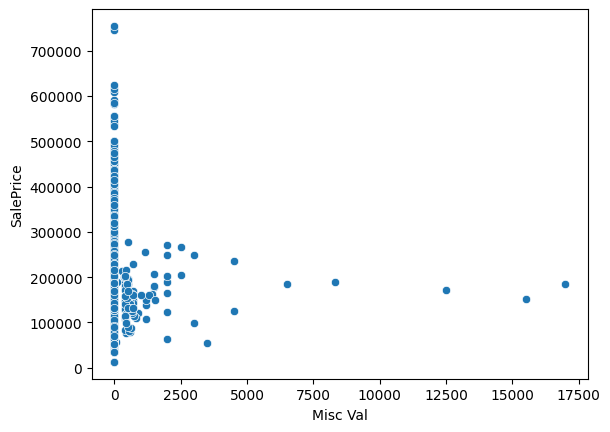

In [38]:
sns.scatterplot(data=Numerical, x='Misc Val', y='SalePrice')

<Axes: xlabel='Misc Val', ylabel='Count'>

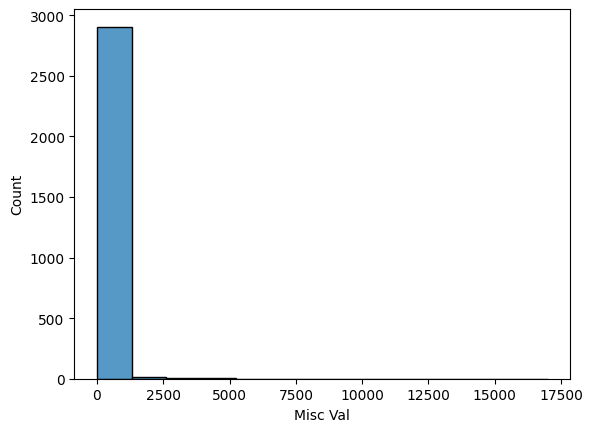

In [39]:
sns.histplot(Numerical['Misc Val'])

In [40]:
Numerical['Misc Val'].describe()

,Misc Val
count,2930.000000
mean,50.635154
std,566.344288
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,17000.000000


In [41]:
#bins = [-1, 0, 2000]
#labels = [0, 'Has Misc Val']
#Categorical['Misc Val'] = pd.cut(Numerical['Misc Val'], bins=bins, labels=labels)
#Numerical.drop(['Misc Val'], axis=1, inplace=True)

In [42]:
Numerical['Misc Val'] = Numerical['Misc Val'].apply(lambda x: np.log(x) if x != 0 else 0)

### Fireplaces

In [43]:
corr = Numerical['Fireplaces'].corr(Numerical['SalePrice'])
corr

np.float64(0.4745580925917764)

<Axes: xlabel='Fireplaces', ylabel='SalePrice'>

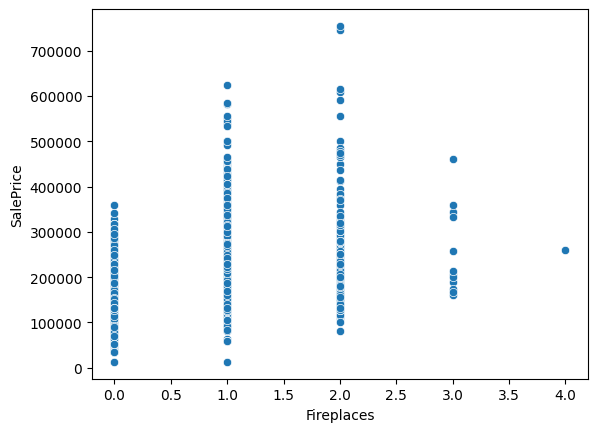

In [44]:
sns.scatterplot(data=Numerical, x='Fireplaces', y='SalePrice')

<Axes: xlabel='Fireplaces', ylabel='Count'>

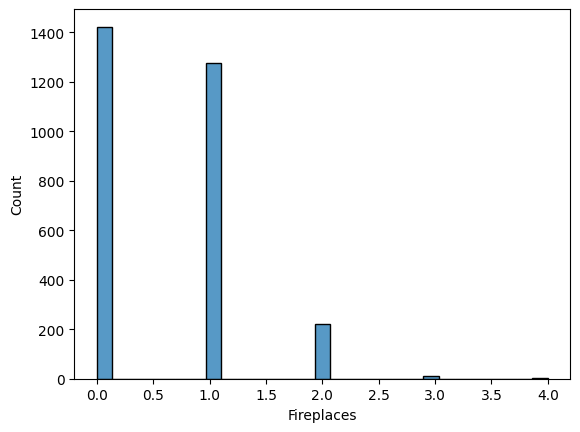

In [45]:
sns.histplot(Numerical['Fireplaces'])

In [46]:
Numerical['Fireplaces'] = Numerical['Fireplaces'].clip(upper=2)
Categorical['Fireplaces'] = Numerical['Fireplaces'].astype(str)
Categorical['Fireplace'] = Categorical['Fireplace Qu'].str.cat(Categorical['Fireplaces'], sep='_')
Categorical.drop(['Fireplace Qu', 'Fireplaces'], axis=1, inplace=True)
Numerical.drop(['Fireplaces'], axis=1, inplace=True)

### Bsmt Unf SF

<Axes: xlabel='Bsmt Unf SF', ylabel='SalePrice'>

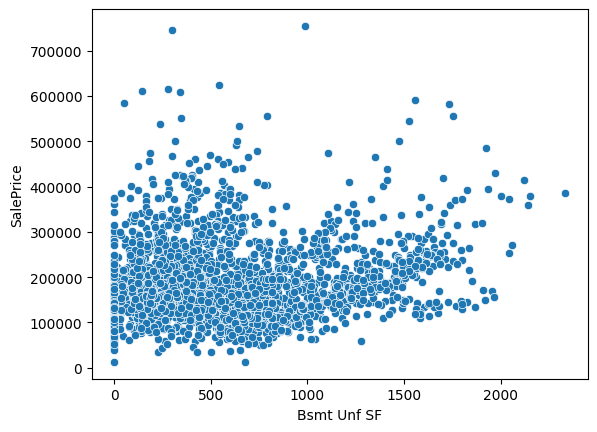

In [47]:
sns.scatterplot(data=Numerical, x='Bsmt Unf SF', y='SalePrice')

<Axes: xlabel='Bsmt Unf SF', ylabel='Count'>

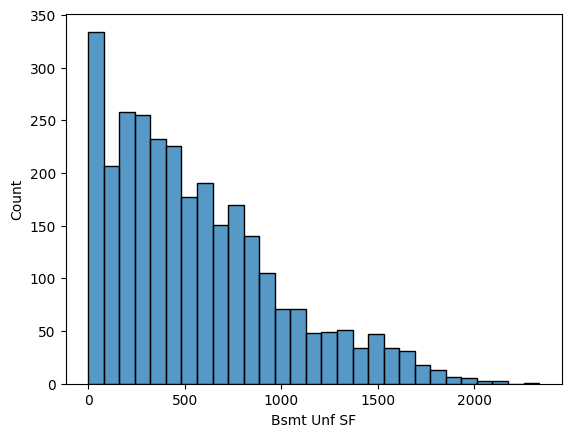

In [48]:
sns.histplot(Numerical['Bsmt Unf SF'])

In [49]:
Numerical['Bsmt Unf SF'] = Numerical['Bsmt Unf SF'].apply(lambda x: np.log(x) if x != 0 else 0)

<Axes: xlabel='Bsmt Unf SF', ylabel='Count'>

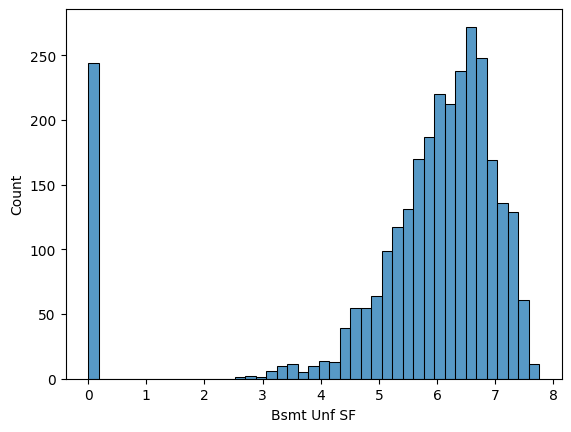

In [50]:
sns.histplot(Numerical['Bsmt Unf SF'])

###Low Qual Fin SF

In [51]:
Numerical['Low Qual Fin SF Percentage'] = Numerical['Low Qual Fin SF']/Numerical['Gr Liv Area']
Numerical.drop(['Gr Liv Area'], axis=1, inplace=True)
Numerical.drop(['Low Qual Fin SF'], axis=1, inplace=True)

<Axes: xlabel='Low Qual Fin SF Percentage', ylabel='SalePrice'>

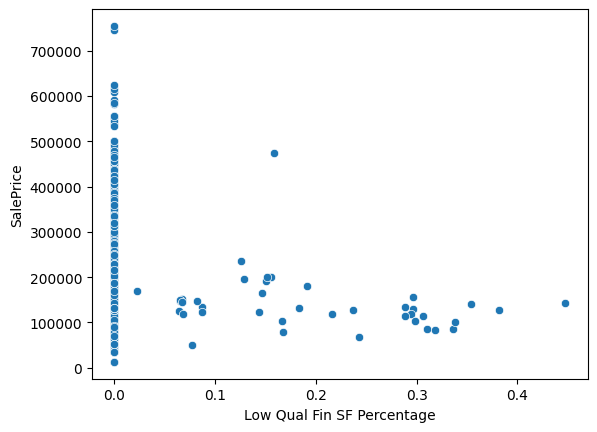

In [52]:
sns.scatterplot(data=Numerical, x='Low Qual Fin SF Percentage', y='SalePrice')

<Axes: xlabel='Low Qual Fin SF Percentage', ylabel='Count'>

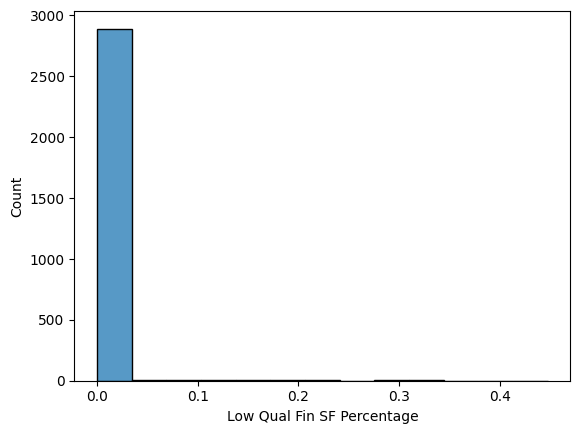

In [53]:
sns.histplot(Numerical['Low Qual Fin SF Percentage'])

In [54]:
Categorical['%LowQualFinSF'] = Numerical['Low Qual Fin SF Percentage']

In [55]:
bins = [-1, 0.0000001, 1]
labels = [0, 'Has Low Quality SF']
Categorical['Low Qual Fin SF'] = pd.cut(Numerical['Low Qual Fin SF Percentage'], bins=bins, labels=labels)

In [56]:
Numerical.drop(['Low Qual Fin SF Percentage'], axis=1, inplace=True)

### Total Rooms

In [57]:
Numerical[['Bedroom AbvGr', 'Kitchen AbvGr', 'TotalBath', 'TotRms AbvGrd', 'SalePrice']].corr()

,Bedroom AbvGr,Kitchen AbvGr,TotalBath,TotRms AbvGrd,SalePrice
Bedroom AbvGr,1.000000,0.240737,0.221749,0.672647,0.143913
Kitchen AbvGr,0.240737,1.000000,0.082214,0.294445,-0.119814
TotalBath,0.221749,0.082214,1.000000,0.434377,0.636099
TotRms AbvGrd,0.672647,0.294445,0.434377,1.000000,0.495474
SalePrice,0.143913,-0.119814,0.636099,0.495474,1.000000


In [58]:
Numerical['TotalRooms'] = Numerical['Bedroom AbvGr'] + Numerical['Kitchen AbvGr'] + Numerical['TotalBath'] + Numerical['TotRms AbvGrd']

In [59]:
Numerical.drop(['Bedroom AbvGr', 'Kitchen AbvGr', 'TotalBath', 'TotRms AbvGrd'], axis=1, inplace=True)

In [60]:
Numerical[['TotalRooms', 'SalePrice']].corr()

,TotalRooms,SalePrice
TotalRooms,1.00000,0.51244
SalePrice,0.51244,1.00000


<Axes: xlabel='TotalRooms', ylabel='SalePrice'>

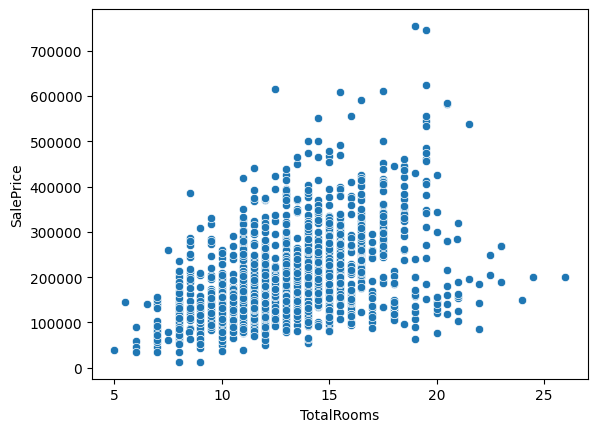

In [61]:
sns.scatterplot(data=Numerical, x='TotalRooms', y='SalePrice')

<Axes: xlabel='TotalRooms', ylabel='Count'>

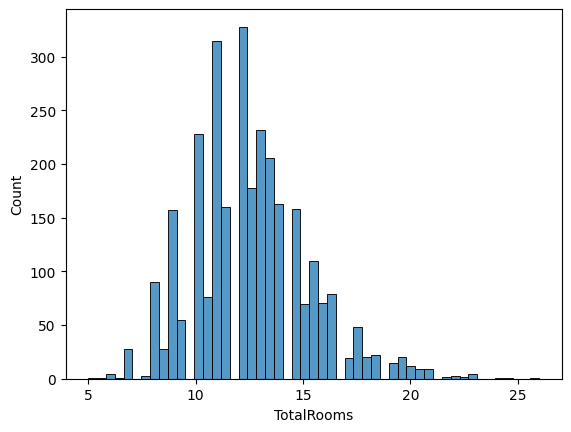

In [62]:
sns.histplot(Numerical['TotalRooms'])

In [63]:
Numerical['TotalRooms'].describe()

,TotalRooms
count,2930.000000
mean,12.559872
std,2.705716
min,5.000000
25%,11.000000
50%,12.000000
75%,14.000000
max,26.000000


In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Numerical['TotalRooms'] = scaler.fit_transform(Numerical[['TotalRooms']])

<Axes: xlabel='TotalRooms', ylabel='Count'>

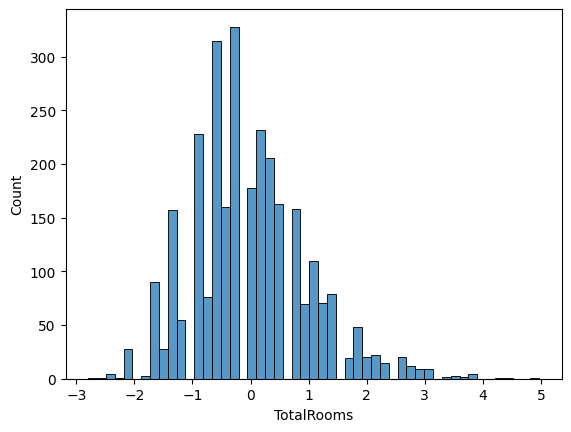

In [65]:
sns.histplot(Numerical['TotalRooms'])

### Model/Year Sold

In [66]:
Categorical[['Mo Sold' ,'Yr Sold']] = Numerical[['Mo Sold', 'Yr Sold']].astype(str)
Categorical['Model&YearSold'] = Categorical['Mo Sold'].str.cat(Categorical['Yr Sold'], sep='_')
Categorical.drop(['Mo Sold',], axis=1, inplace=True)
Categorical.drop(['Yr Sold'], axis=1, inplace=True)
Numerical.drop(['Mo Sold'], axis=1, inplace=True)
Numerical.drop(['Yr Sold'], axis=1, inplace=True)

###Wood Deck

<Axes: xlabel='Wood Deck SF', ylabel='SalePrice'>

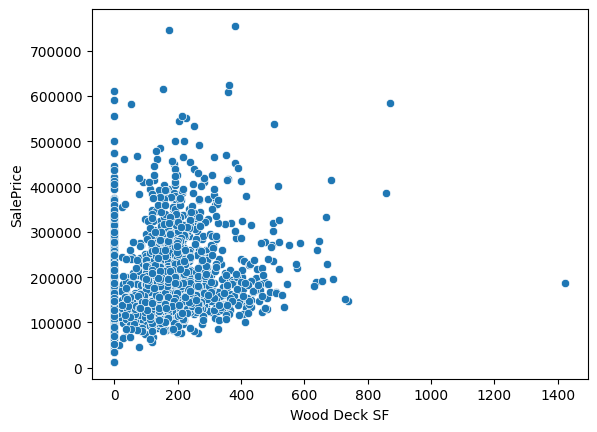

In [67]:
sns.scatterplot(data=Numerical, x='Wood Deck SF', y='SalePrice')

<Axes: xlabel='Wood Deck SF', ylabel='Count'>

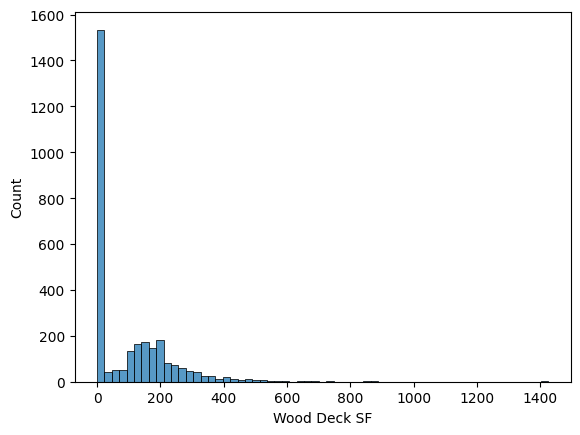

In [68]:
sns.histplot(Numerical['Wood Deck SF'])

In [69]:
Numerical['Wood Deck SF'].sort_values()

,Wood Deck SF
2055,0
2039,0
2041,0
2078,0
1110,0
...,...
2910,728
1488,736
2522,857
2450,870


In [70]:
Numerical['Wood Deck SF'].describe()

,Wood Deck SF
count,2930.000000
mean,93.751877
std,126.361562
min,0.000000
25%,0.000000
50%,0.000000
75%,168.000000
max,1424.000000


In [71]:
bins = [-1, 0, 1000]
labels = [0, 'Has Wood Deck']
Categorical['Wood Deck'] = pd.cut(Numerical['Wood Deck SF'], bins=bins, labels=labels)

In [72]:
Numerical.drop(['Wood Deck SF'], axis=1, inplace=True)

### Pool Area

<Axes: xlabel='Pool Area', ylabel='SalePrice'>

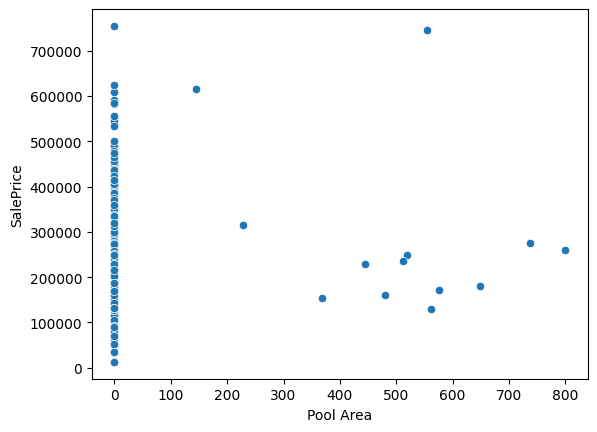

In [73]:
sns.scatterplot(data=Numerical, x='Pool Area', y='SalePrice')

<Axes: xlabel='Pool Area', ylabel='Count'>

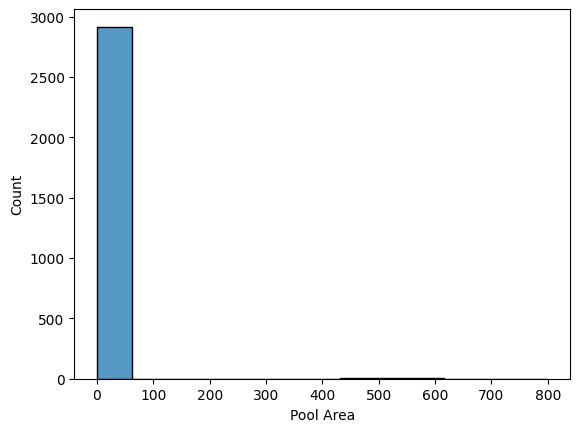

In [74]:
sns.histplot(Numerical['Pool Area'])

In [75]:
bins = [-1, 0, 1000]
labels = [0, 'Has Pool']
Categorical['Pool'] = pd.cut(Numerical['Pool Area'], bins=bins, labels=labels)

In [76]:
Numerical.drop(['Pool Area'], axis=1, inplace=True)

###Bsmt Unf SF

<Axes: xlabel='Bsmt Unf SF', ylabel='SalePrice'>

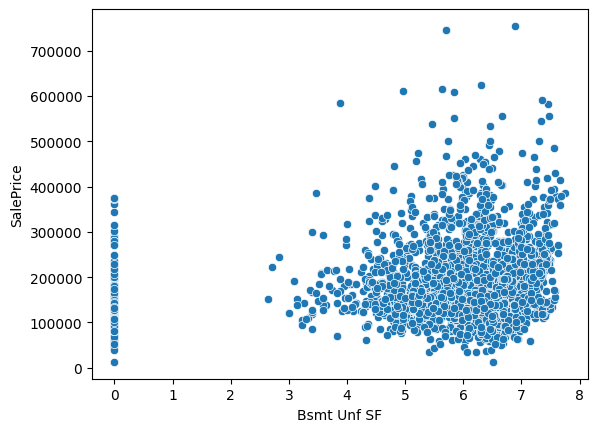

In [77]:
sns.scatterplot(data=Numerical, x='Bsmt Unf SF', y='SalePrice')

<Axes: xlabel='Bsmt Unf SF', ylabel='Count'>

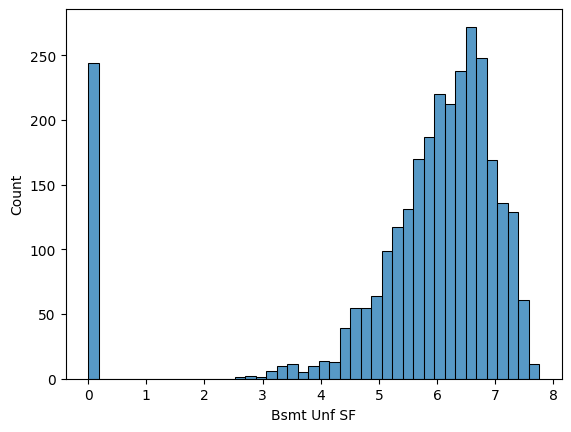

In [78]:
sns.histplot(Numerical['Bsmt Unf SF'])

In [79]:
Numerical['Bsmt Unf SF'].describe()

,Bsmt Unf SF
count,2930.000000
mean,5.617227
std,1.873017
min,0.000000
25%,5.389072
50%,6.144186
75%,6.686797
max,7.756195


In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Numerical['Bsmt Unf SF'] = scaler.fit_transform(Numerical[['Bsmt Unf SF']])

<Axes: xlabel='Bsmt Unf SF', ylabel='Count'>

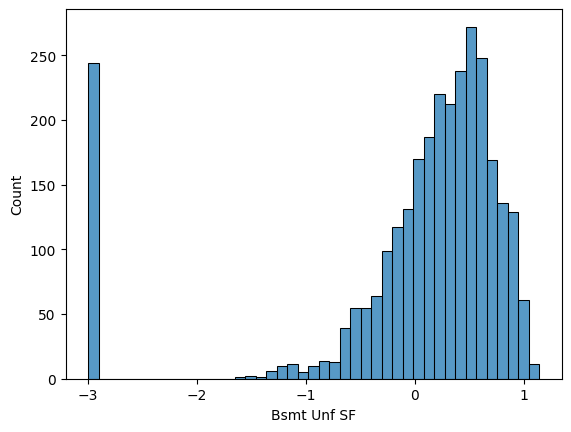

In [81]:
sns.histplot(Numerical['Bsmt Unf SF'])

###BsmtFin SF

<Axes: xlabel='BsmtFin SF', ylabel='SalePrice'>

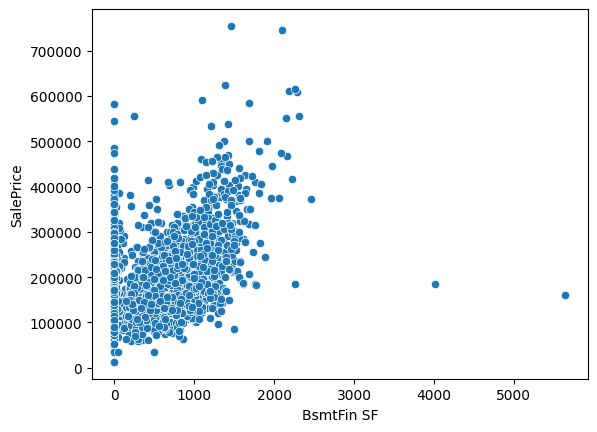

In [82]:
sns.scatterplot(data=Numerical, x='BsmtFin SF', y='SalePrice')

<Axes: xlabel='BsmtFin SF', ylabel='Count'>

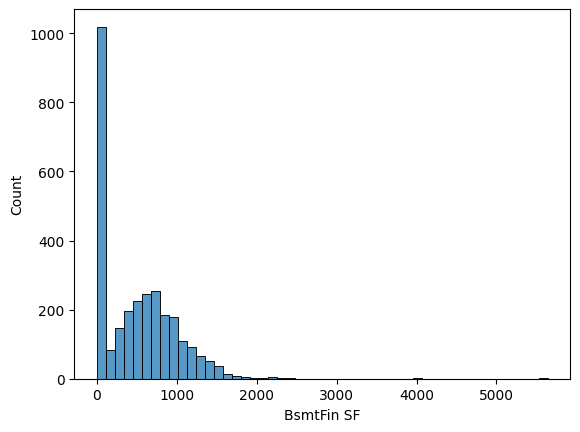

In [83]:
sns.histplot(Numerical['BsmtFin SF'])

In [84]:
Numerical['BsmtFin SF'].describe()

,BsmtFin SF
count,2930.000000
mean,492.351997
std,477.241583
min,0.000000
25%,0.000000
50%,460.000000
75%,808.000000
max,5644.000000


In [85]:
Q1 = Numerical['BsmtFin SF'].quantile(0.25)
Q3 = Numerical['BsmtFin SF'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Numerical['BsmtFin SF'] = Numerical['BsmtFin SF'][
    (Numerical['BsmtFin SF'] >= lower_bound) & (Numerical['BsmtFin SF'] <= upper_bound)]

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Numerical['BsmtFin SF'] = scaler.fit_transform(Numerical[['BsmtFin SF']])

<Axes: xlabel='BsmtFin SF', ylabel='Count'>

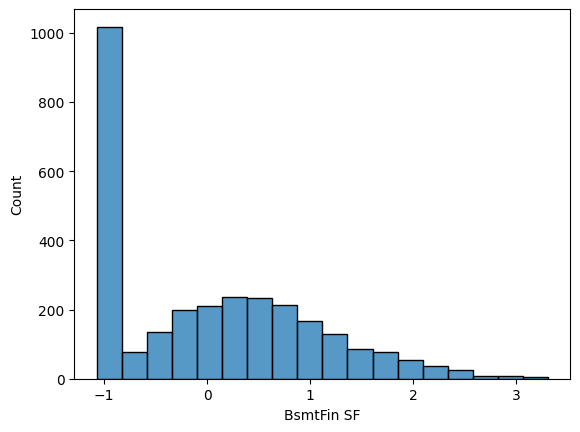

In [87]:
sns.histplot(Numerical['BsmtFin SF'])

### TotalSF

<Axes: xlabel='TotalSF', ylabel='SalePrice'>

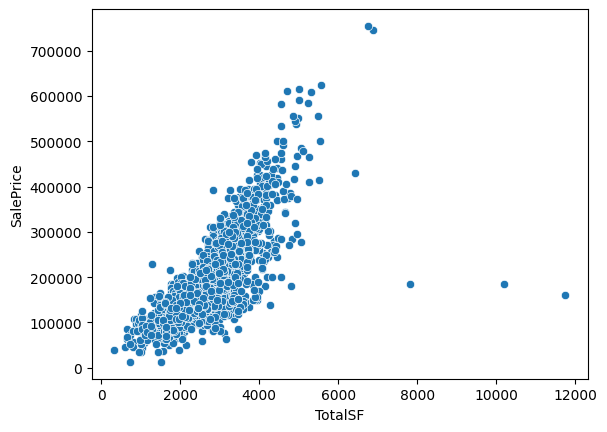

In [88]:
sns.scatterplot(data=Numerical, x='TotalSF', y='SalePrice')

<Axes: xlabel='TotalSF', ylabel='Count'>

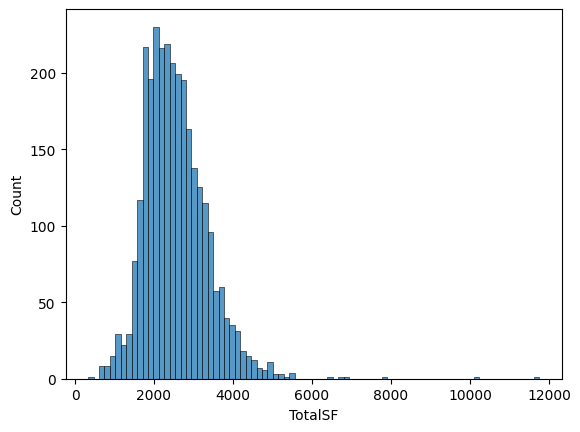

In [89]:
sns.histplot(Numerical['TotalSF'])

In [90]:
Numerical['TotalSF'] = Numerical['TotalSF'].clip(upper=5000)

In [91]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Numerical['TotalSF'] = scaler.fit_transform(Numerical[['TotalSF']])

<Axes: xlabel='TotalSF', ylabel='Count'>

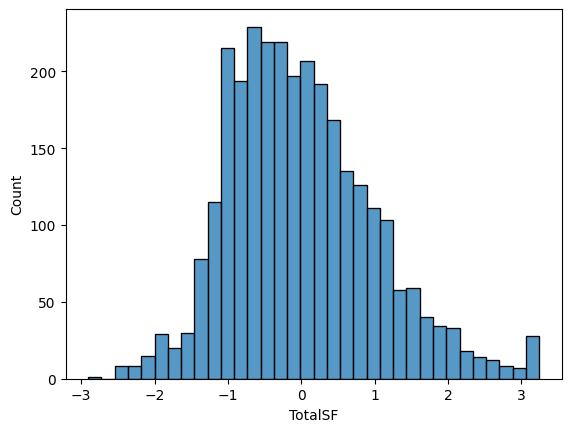

In [92]:
sns.histplot(Numerical['TotalSF'])

### Total Porch SF

<Axes: xlabel='TotalPorch SF', ylabel='SalePrice'>

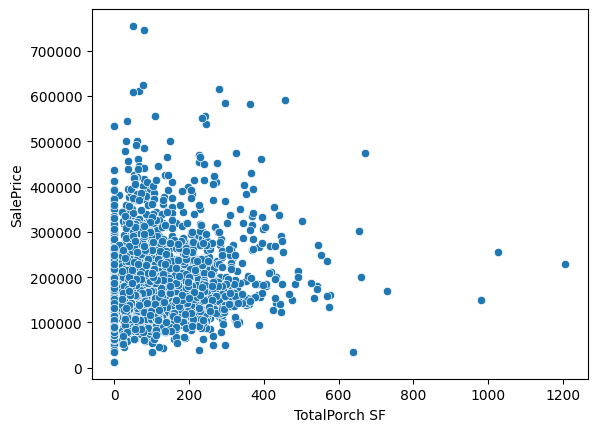

In [93]:
sns.scatterplot(data=Numerical, x='TotalPorch SF', y='SalePrice')

<Axes: xlabel='TotalPorch SF', ylabel='Count'>

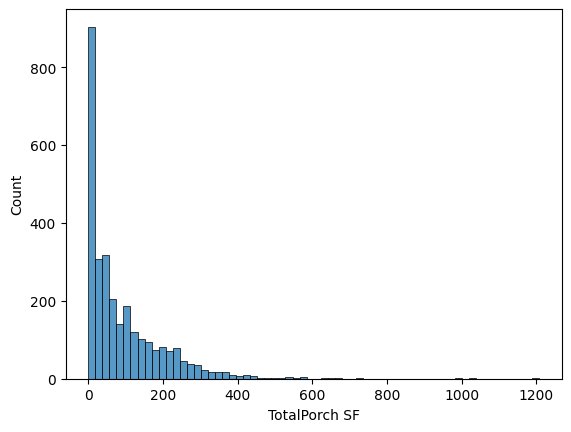

In [94]:
sns.histplot(Numerical['TotalPorch SF'])

In [95]:
Numerical['TotalPorch SF'] = Numerical['TotalPorch SF'].apply(lambda x: np.log(x) if x != 0 else 0)

<Axes: xlabel='TotalPorch SF', ylabel='Count'>

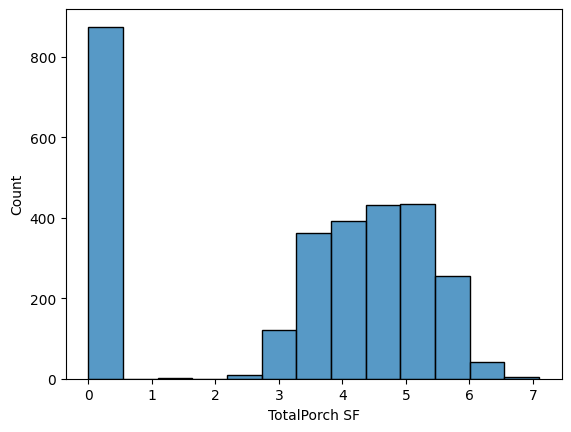

In [96]:
sns.histplot(Numerical['TotalPorch SF'])

### Lot Area

<Axes: xlabel='LotArea', ylabel='SalePrice'>

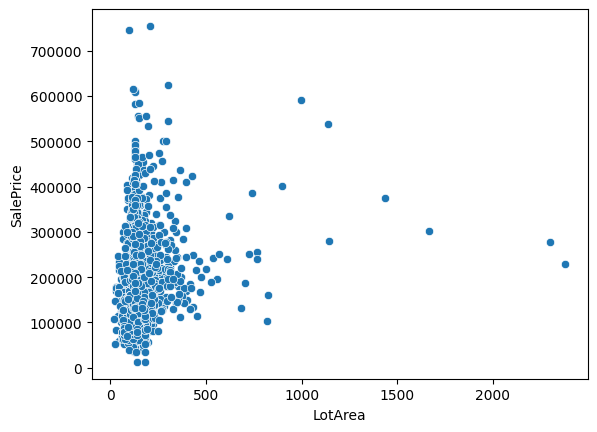

In [97]:
sns.scatterplot(data=Numerical, x='LotArea', y='SalePrice')

<Axes: xlabel='LotArea', ylabel='Count'>

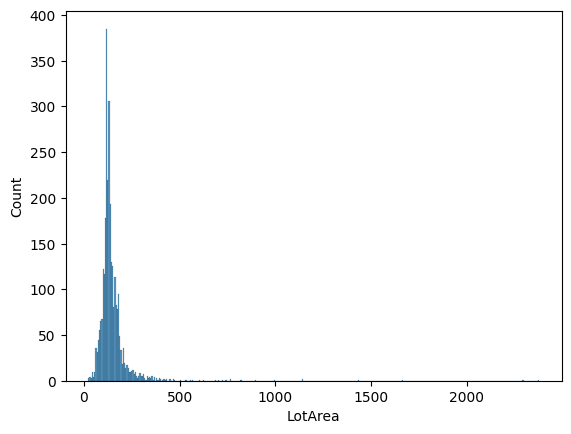

In [98]:
sns.histplot(Numerical['LotArea'])

In [99]:
Q1 = Numerical['LotArea'].quantile(0.25)
Q3 = Numerical['LotArea'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Numerical['LotArea'] = Numerical['LotArea'][(Numerical['LotArea'] >= lower_bound) & (Numerical['LotArea'] <= upper_bound)]

<Axes: xlabel='LotArea', ylabel='Count'>

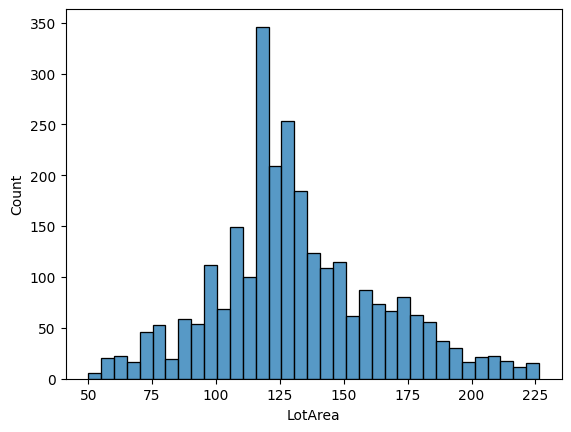

In [100]:
sns.histplot(Numerical['LotArea'])

In [101]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Numerical['LotArea'] = scaler.fit_transform(Numerical[['LotArea']])

<Axes: xlabel='LotArea', ylabel='Count'>

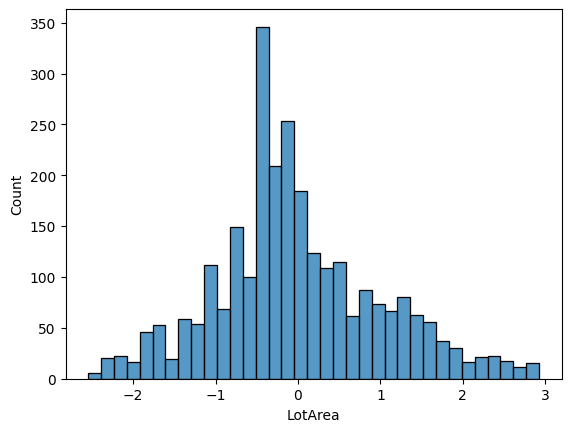

In [102]:
sns.histplot(Numerical['LotArea'])

### Overall Quality

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

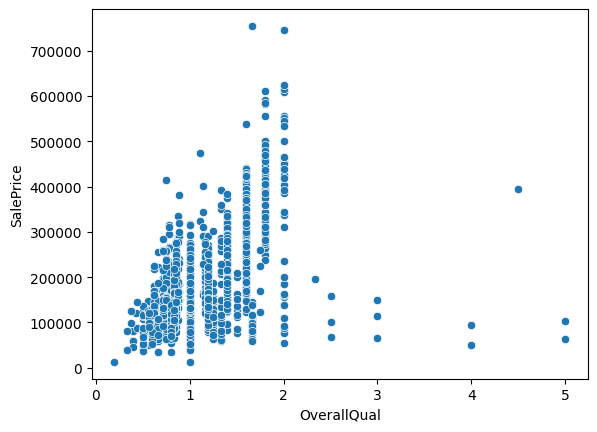

In [103]:
sns.scatterplot(data=Numerical, x='OverallQual', y='SalePrice')

<Axes: xlabel='OverallQual', ylabel='Count'>

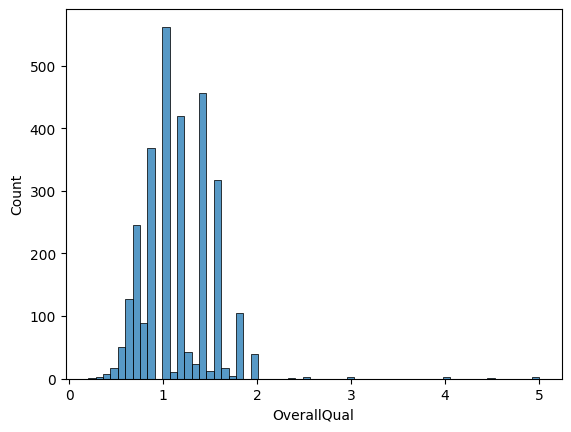

In [104]:
sns.histplot(Numerical['OverallQual'])

In [105]:
Numerical['OverallQual'].clip(upper=2)
Categorical['OverallQual'] = Numerical['OverallQual'].astype(str)
Categorical.drop(['OverallQual'], axis=1, inplace=True)

### Garage Area per Car

<Axes: xlabel='GarageAreaperCar', ylabel='SalePrice'>

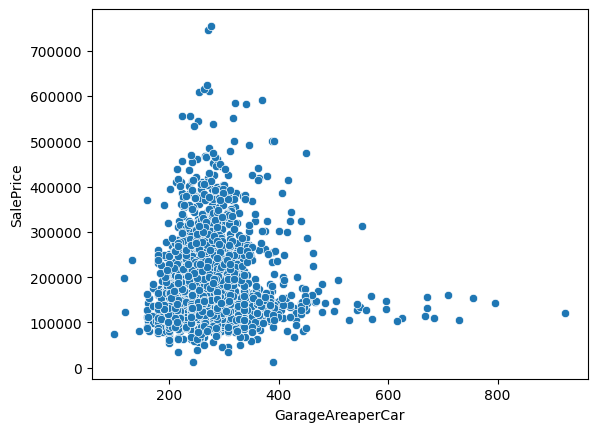

In [106]:
sns.scatterplot(data=Numerical, x='GarageAreaperCar', y='SalePrice')

<Axes: xlabel='GarageAreaperCar', ylabel='Count'>

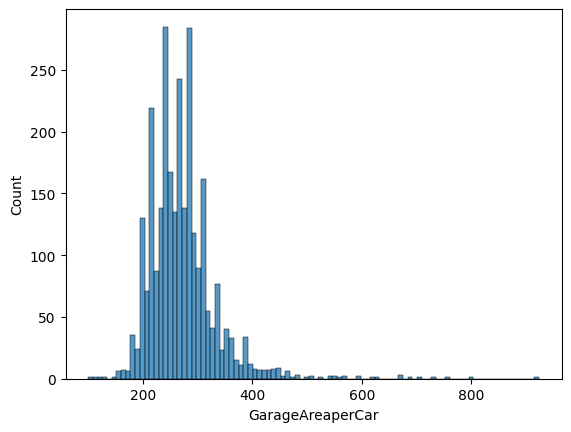

In [107]:
sns.histplot(Numerical['GarageAreaperCar'])

In [108]:
Numerical['GarageAreaperCar'] = Numerical['GarageAreaperCar'].clip(upper=400)

In [109]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Numerical['GarageAreaperCar'] = scaler.fit_transform(Numerical[['GarageAreaperCar']])

<Axes: xlabel='GarageAreaperCar', ylabel='Count'>

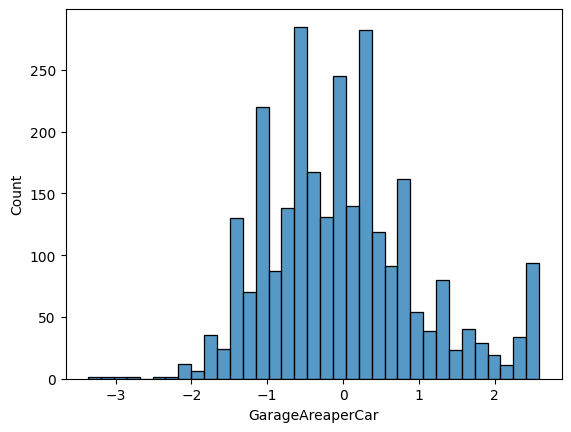

In [110]:
sns.histplot(Numerical['GarageAreaperCar'])

### Total Rooms

<Axes: xlabel='TotalRooms', ylabel='SalePrice'>

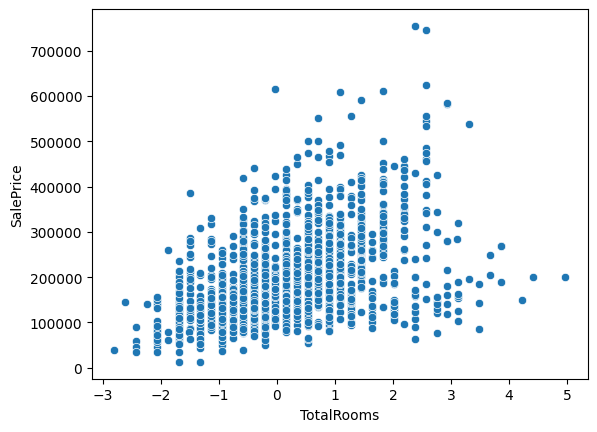

In [111]:
sns.scatterplot(data=Numerical, x='TotalRooms', y='SalePrice')

<Axes: xlabel='TotalRooms', ylabel='Count'>

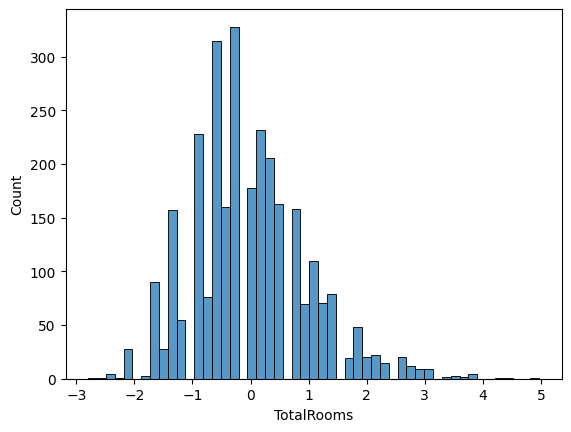

In [112]:
sns.histplot(Numerical['TotalRooms'])

In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Numerical['TotalRooms'] = scaler.fit_transform(Numerical[['TotalRooms']])

<Axes: xlabel='TotalRooms', ylabel='Count'>

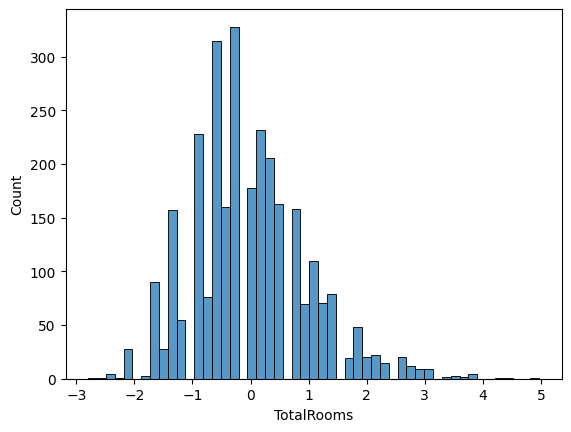

In [114]:
sns.histplot(Numerical['TotalRooms'])

### Sale Price (Y-Intercept)

<Axes: xlabel='SalePrice', ylabel='Count'>

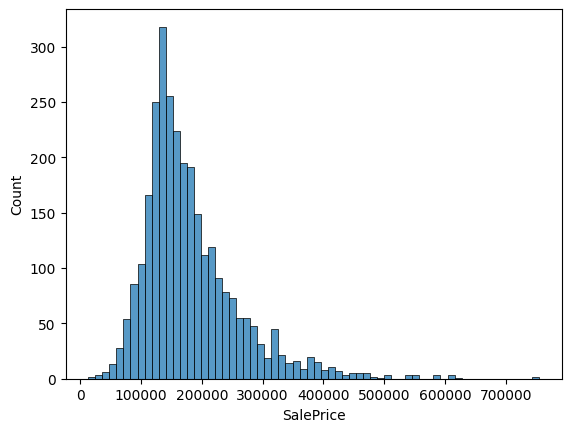

In [115]:
sns.histplot(Numerical['SalePrice'])

In [116]:
Numerical['SalePrice'].sort_values(ascending=True)

,SalePrice
181,12789
1553,13100
726,34900
2843,35000
2880,35311
...,...
44,611657
1063,615000
2445,625000
1760,745000


In [117]:
Numerical['SalePrice'] = Numerical['SalePrice'].clip(upper=450000)

In [118]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Numerical['SalePrice'] = scaler.fit_transform(Numerical[['SalePrice']])

<Axes: xlabel='SalePrice', ylabel='Count'>

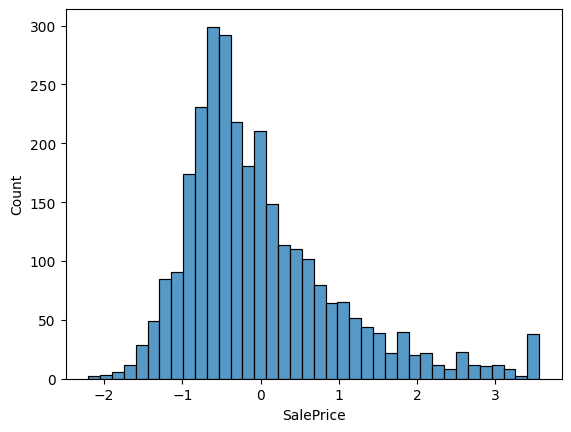

In [119]:
sns.histplot(Numerical['SalePrice'])

#Numerical Columns Dropped

In [120]:
Numerical.columns

Index(['Order', 'PID', 'Bsmt Unf SF', 'Misc Val', 'SalePrice', 'BsmtFin SF',
       'TotalSF', 'TotalPorch SF', 'LotArea', 'OverallQual',
       'GarageAreaperCar', 'TotalRooms'],
      dtype='object')

In [121]:
Numerical[['Order', 'PID', 'Bsmt Unf SF', 'SalePrice', 'BsmtFin SF', 'TotalSF', 'TotalPorch SF',
       'LotArea', 'OverallQual']].corr()

,Order,PID,Bsmt Unf SF,SalePrice,BsmtFin SF,TotalSF,TotalPorch SF,LotArea,OverallQual
Order,1.000000,0.173593,-0.020430,-0.031598,-0.027987,-0.027386,0.009870,0.026553,-0.039428
PID,0.173593,1.000000,-0.103048,-0.248330,-0.099183,-0.188653,-0.026452,0.056329,-0.216011
Bsmt Unf SF,-0.020430,-0.103048,1.000000,0.167785,-0.339895,0.316807,0.151712,-0.008799,0.205733
SalePrice,-0.031598,-0.248330,0.167785,1.000000,0.398129,0.827357,0.292851,0.124089,0.605977
BsmtFin SF,-0.027987,-0.099183,-0.339895,0.398129,1.000000,0.347741,0.030956,0.051345,0.150617
TotalSF,-0.027386,-0.188653,0.316807,0.827357,0.347741,1.000000,0.303747,0.158028,0.569752
TotalPorch SF,0.009870,-0.026452,0.151712,0.292851,0.030956,0.303747,1.000000,0.076590,0.226761
LotArea,0.026553,0.056329,-0.008799,0.124089,0.051345,0.158028,0.076590,1.000000,-0.010896
OverallQual,-0.039428,-0.216011,0.205733,0.605977,0.150617,0.569752,0.226761,-0.010896,1.000000


In [122]:
Numerical.drop(['GarageAreaperCar', 'TotalRooms'], axis=1, inplace=True)

#One Hot Encode

In [123]:
Categorical = pd.get_dummies(Categorical)

# Categorical Columns Dropped

In [124]:
Categorical = Categorical.drop(['Pool', '%LowQualFinSF', 'Model&YearSold', 'Land Contour', 'Wood Deck'], axis=1, errors='ignore')
Categorical = Categorical.drop(['Low Qual Fin SF', 'Lot Shape', 'Utilities', 'Lot Config'], axis=1, errors='ignore')

In [125]:
Categorical.columns

Index(['Year', 'Street_Grvl', 'Street_Pave', 'Lot Shape_IR1', 'Lot Shape_IR2',
       'Lot Shape_IR3', 'Lot Shape_Reg', 'Land Contour_Bnk',
       'Land Contour_HLS', 'Land Contour_Low',
       ...
       'Model&YearSold_8_2008', 'Model&YearSold_8_2009',
       'Model&YearSold_9_2006', 'Model&YearSold_9_2007',
       'Model&YearSold_9_2008', 'Model&YearSold_9_2009', 'Wood Deck_0',
       'Wood Deck_Has Wood Deck', 'Pool_0', 'Pool_Has Pool'],
      dtype='object', length=1652)

In [126]:
CateCorr = pd.concat([Categorical, Numerical['SalePrice']], axis=1).corr()
CateCorr

,Year,Street_Grvl,Street_Pave,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,...,Model&YearSold_8_2009,Model&YearSold_9_2006,Model&YearSold_9_2007,Model&YearSold_9_2008,Model&YearSold_9_2009,Wood Deck_0,Wood Deck_Has Wood Deck,Pool_0,Pool_Has Pool,SalePrice
Year,1.000000,-0.077325,0.077325,0.245819,0.101794,0.039317,-0.280384,-0.178693,0.071382,-0.020162,...,-0.020266,0.024379,0.012521,-0.023449,0.007651,-0.339504,0.339538,-0.001550,0.001550,0.628027
Street_Grvl,-0.077325,1.000000,-1.000000,-0.022767,0.023155,-0.004752,0.015384,0.096095,0.013712,0.028460,...,-0.009429,-0.007640,-0.007544,-0.007051,-0.008009,0.029419,-0.029376,0.004281,-0.004281,-0.061942
Street_Pave,0.077325,-1.000000,1.000000,0.022767,-0.023155,0.004752,-0.015384,-0.096095,-0.013712,-0.028460,...,0.009429,0.007640,0.007544,0.007051,0.008009,-0.029419,0.029376,-0.004281,0.004281,0.061942
Lot Shape_IR1,0.245819,-0.022767,0.022767,1.000000,-0.115596,-0.052490,-0.933271,-0.018822,0.156641,0.035518,...,-0.008628,-0.004308,-0.008513,-0.017946,-0.006095,-0.159152,0.158192,-0.007145,0.007145,0.273935
Lot Shape_IR2,0.101794,0.023155,-0.023155,-0.115596,1.000000,-0.012092,-0.214993,0.010584,0.020448,0.082530,...,-0.023993,0.017119,-0.019198,0.041349,-0.020380,-0.045483,0.045596,0.010894,-0.010894,0.102372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wood Deck_0,-0.339504,0.029419,-0.029419,-0.159152,-0.045483,-0.003088,0.171368,0.083965,-0.053425,-0.044616,...,0.008114,-0.025321,0.018647,0.023716,-0.024649,1.000000,-0.999316,0.038760,-0.038760,-0.325316
Wood Deck_Has Wood Deck,0.339538,-0.029376,0.029376,0.158192,0.045596,0.003139,-0.170473,-0.083828,0.053568,0.039892,...,-0.008013,0.025404,-0.024455,-0.023642,0.024735,-0.999316,1.000000,-0.038807,0.038807,0.325252
Pool_0,-0.001550,0.004281,-0.004281,-0.007145,0.010894,-0.064736,0.013309,-0.012612,-0.038026,-0.026606,...,0.009815,0.007953,0.007854,0.007340,0.008338,0.038760,-0.038807,1.000000,-1.000000,-0.062318
Pool_Has Pool,0.001550,-0.004281,0.004281,0.007145,-0.010894,0.064736,-0.013309,0.012612,0.038026,0.026606,...,-0.009815,-0.007953,-0.007854,-0.007340,-0.008338,-0.038760,0.038807,-1.000000,1.000000,0.062318


# Data Split

In [127]:
df2 = pd.DataFrame
df2 = pd.concat([Categorical, Numerical], axis=1)
df2

,Year,Street_Grvl,Street_Pave,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,...,Order,PID,Bsmt Unf SF,Misc Val,SalePrice,BsmtFin SF,TotalSF,TotalPorch SF,LotArea,OverallQual
0,3920,False,True,True,False,False,False,False,False,False,...,1,526301100,0.251946,0.000000,0.463199,0.347658,0.259932,4.127134,2.889679,1.200000
1,3922,False,True,False,False,False,True,False,False,False,...,2,526350040,-0.010042,0.000000,-0.987847,0.287752,-1.002210,4.787492,0.408651,0.833333
2,3916,False,True,True,False,False,False,False,False,False,...,3,526351010,0.207789,9.433484,-0.104028,0.977783,0.157169,3.583519,1.365205,1.000000
3,3936,False,True,False,False,False,True,False,False,False,...,4,526353030,0.712633,0.000000,0.845748,1.292845,2.215066,0.000000,-0.374766,1.400000
4,3995,False,True,True,False,False,False,False,False,False,...,5,527105010,-0.372322,0.000000,0.132097,0.684908,0.024104,3.526361,1.698598,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,3968,False,True,True,False,False,False,False,False,False,...,2926,923275080,-0.214819,0.000000,-0.493172,0.747033,-0.701825,0.000000,2.554750,1.000000
2926,3966,False,True,True,False,False,False,False,False,True,...,2927,923276100,-0.075166,0.000000,-0.644873,0.316595,-1.018019,0.000000,-0.115941,1.000000
2927,3984,False,True,False,False,False,True,False,False,False,...,2928,923400125,0.393626,6.551080,-0.631681,-0.322404,-0.865192,3.465736,1.125528,1.000000
2928,3949,False,True,False,False,False,True,False,False,False,...,2929,924100070,-0.183814,0.000000,-0.130411,1.579064,0.315266,3.637586,-0.064809,1.000000


In [128]:
df2.isnull().sum()

,0
Year,0
Street_Grvl,0
Street_Pave,0
Lot Shape_IR1,0
Lot Shape_IR2,0
...,...
BsmtFin SF,14
TotalSF,0
TotalPorch SF,0
LotArea,206


In [129]:
for i in df2:
  if df2[i].isnull().sum() > 0:
    df2[i] = df2[i].fillna(df2[i].mean())

In [130]:
x = df2.drop('SalePrice', axis=1)
y = df2['SalePrice']

In [131]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.model_selection import train_test_split
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

# Training Models

In [142]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

x_final_train = pd.concat([x_train, x_val])
y_final_train = pd.concat([y_train, y_val])

In [143]:
lin_reg = LinearRegression()
ridge_reg = Ridge()
random_forest = RandomForestRegressor()

lin_reg.fit(x_final_train, y_final_train)
ridge_reg.fit(x_final_train, y_final_train)
random_forest.fit(x_final_train, y_final_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning:

Ill-conditioned matrix (rcond=2.49478e-21): result may not be accurate.



RandomForestRegressor()

In [144]:
lin_reg_pred = lin_reg.predict(x_test)
ridge_reg_pred = ridge_reg.predict(x_test)
random_forest_pred = random_forest.predict(x_test)

In [145]:
lin_reg_rmse = np.sqrt(mean_squared_error(y_test, lin_reg_pred))
ridge_reg_rmse = np.sqrt(mean_squared_error(y_test, ridge_reg_pred))
random_forest_rmse = np.sqrt(mean_squared_error(y_test, random_forest_pred))

In [146]:
lin_reg_mae = mean_absolute_error(y_test, lin_reg_pred)
ridge_reg_mae = mean_absolute_error(y_test, ridge_reg_pred)
random_forest_mae = mean_absolute_error(y_test, random_forest_pred)

In [147]:
lin_reg_r2 = r2_score(y_test, lin_reg_pred)
ridge_reg_r2 = r2_score(y_test, ridge_reg_pred)
random_forest_r2 = r2_score(y_test, random_forest_pred)

In [148]:
print("Linear Regression RMSE:", lin_reg_rmse)
print("Linear Regression MAE:", lin_reg_mae)
print("Linear Regression R2 Score:", lin_reg_r2)

Linear Regression RMSE: 0.30880895232751027
Linear Regression MAE: 0.23752889499936577
Linear Regression R2 Score: 0.9189303136401392


In [149]:
print("Ridge Regression RMSE:", ridge_reg_rmse)
print("Ridge Regression MAE:", ridge_reg_mae)
print("Ridge Regression R2 Score:", ridge_reg_r2)

Ridge Regression RMSE: 0.25629579996994606
Ridge Regression MAE: 0.19528437890260733
Ridge Regression R2 Score: 0.9441579044491787


In [150]:
print("Random Forest RMSE:", random_forest_rmse)
print("Random Forest MAE:", random_forest_mae)
print("Random Forest R2 Score:", random_forest_r2)

Random Forest RMSE: 0.25795381307854687
Random Forest MAE: 0.18860455948688243
Random Forest R2 Score: 0.9434330669349795


#Visualization

Based on the Section above, Random Forest works better for this model

In [141]:
import plotly.express as px

px.scatter(x=y_test, y=random_forest_pred, title='Linear Regression via Random Forest', trendline='ols', trendline_color_override='red')